<a href="https://colab.research.google.com/github/Alok180804/LightCurveAnalysis/blob/main/Kepler10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
pip install lightkurve astropy pandas matplotlib

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

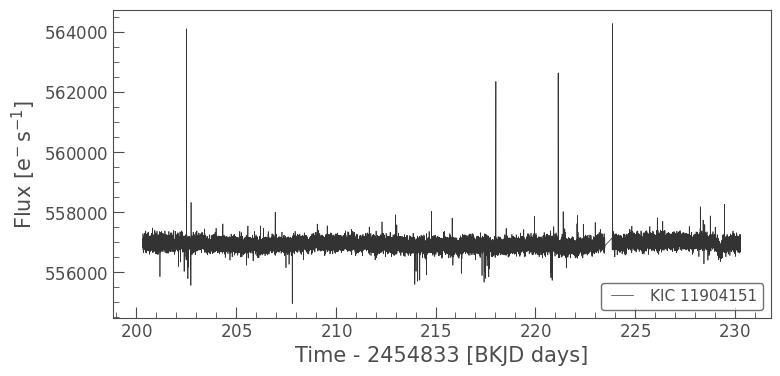

In [21]:
import lightkurve as lk
search_result = lk.search_lightcurve("Kepler-10", mission="Kepler")
lc = search_result[0].download()
lc.plot()

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

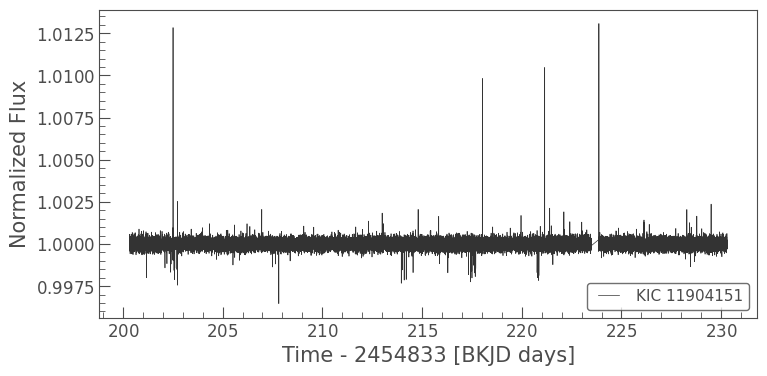

In [22]:
# Step 1: Remove NaN values
lc_clean = lc.remove_nans()

# Step 2: Normalize the flux (optional, for better visual comparison)
lc_norm = lc_clean.normalize()

# Step 3: Flatten the light curve to remove long-term trends (optional, but useful)
lc_flat = lc_norm.flatten(window_length=401)

# Step 4: Plot the cleaned light curve
lc_flat.plot()

<Axes: xlabel='Time - 2454833 [BKJD days]', ylabel='Normalized Flux'>

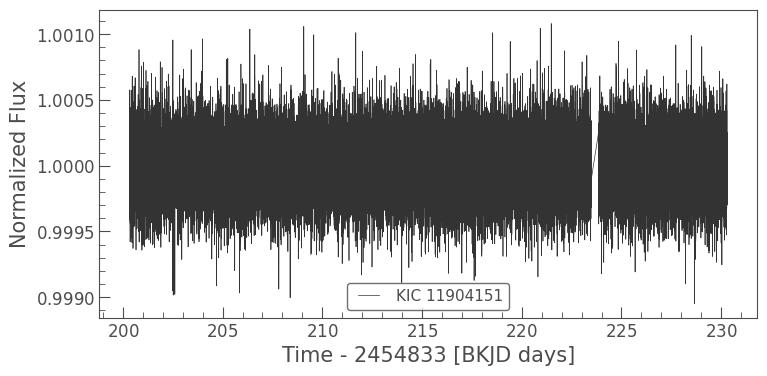

In [23]:
# Sigma clipping to remove extreme outliers
lc_clipped = lc_flat.remove_outliers(sigma=5)
lc_clipped.plot()

<Axes: xlabel='Period [$\\mathrm{d}$]', ylabel='Power'>

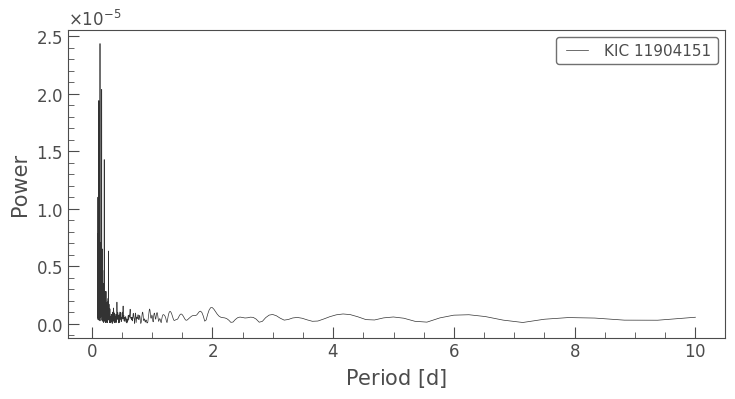

In [24]:
# If you've already preprocessed and cleaned your light curve:
# e.g., lc_clipped from previous steps

# Step 1: Generate Lomb-Scargle periodogram
periodogram = lc_clipped.to_periodogram(method='lombscargle', minimum_period=0.1, maximum_period=10)

# Step 2: Plot the periodogram
periodogram.plot()

In [25]:
best_frequency = periodogram.frequency_at_max_power
print("Best frequency:", best_frequency)

Best frequency: 7.165813461381891 1 / d


In [26]:
best_period = periodogram.period_at_max_power
print("Best period:", best_period)

Best period: 0.13955149759189447 d


In [27]:
amplitude = periodogram.max_power
print("Amplitude at best period:", amplitude)

Amplitude at best period: 2.438345447291397e-05


<Axes: xlabel='Phase [JD]', ylabel='Normalized Flux'>

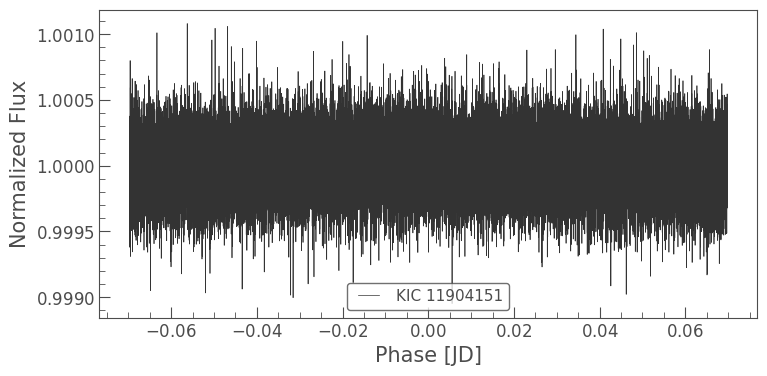

In [28]:
# Fold the light curve over the best period
lc_folded = lc_clipped.fold(period=best_period)

# Plot folded light curve
lc_folded.plot()
